<a href="https://colab.research.google.com/github/verneh/pytorch/blob/main/diffusers_stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diffusers / Stable Diffusion 1.4 Experiments**

In [1]:
# install dependencies.
!pip install diffusers==0.3.0
!pip install transformers scipy ftfy
!pip install ipywidgets==7.7.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 153 kB 31.0 MB/s 
     |████████████████████████████████| 120 kB 71.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 13.5 MB/s 
     |████████████████████████████████| 53 kB 1.5 MB/s 
     |████████████████████████████████| 6.6 MB 47.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 123 kB 36.2 MB/s 
     |████████████████████████████████| 245 kB 63.1 MB/s 
     |████████████████████████████████| 1.6 MB 60.9 MB/s 
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab-widgets 3.0.3
    Uninstalling jupyterlab-widgets-3.0.3:
      Successfully uninstalled jupyterlab-widgets-3.0.3
  Attempting uninstall: ipywidgets
    Fo

In [2]:
# grab user access token through huggingface 
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [3]:
# import libraries.
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline
from PIL import Image

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [4]:
# check which GPU you are using.
!nvidia-smi

Mon Sep 19 07:31:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
# create the pipeline.
experimental_pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", revision="fp16", torch_dtype=torch.float16, use_auth_token=True)

Downloading:   0%|          | 0.00/1.34k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/572 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/246M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/788 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/71.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

{'trained_betas'} was not found in config. Values will be initialized to default values.


In [8]:
# shift the pipeline for faster inference.
experimental_pipe = experimental_pipe.to("cuda")

  0%|          | 0/51 [00:00<?, ?it/s]

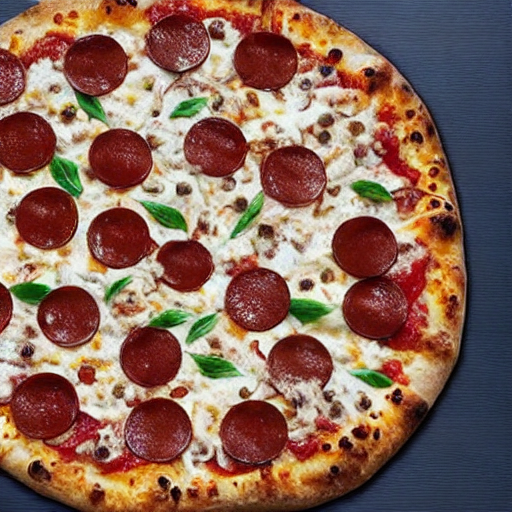

In [9]:
# generate images.
description_one = "a photograph of a domino's pizza on a table"
with autocast("cuda"):
  image_one = experimental_pipe(description_one).images[0]
image_one 
# if one wants to save the image.
# image_one.save(f"dominos.png")

  0%|          | 0/51 [00:00<?, ?it/s]

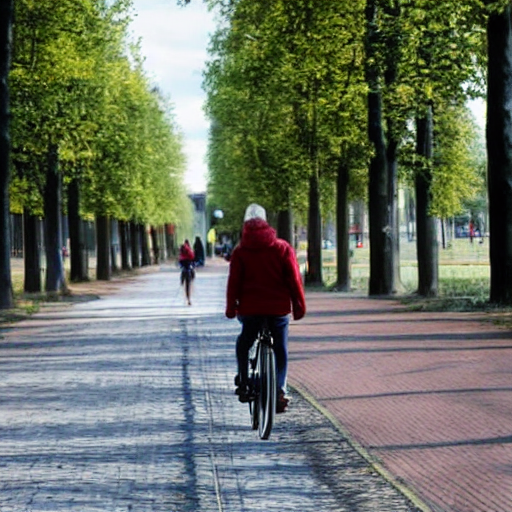

In [10]:
description_two = "a person biking in the Netherlands"
with autocast("cuda"):
  image_two = experimental_pipe(description_two).images[0]
image_two 

  0%|          | 0/51 [00:00<?, ?it/s]

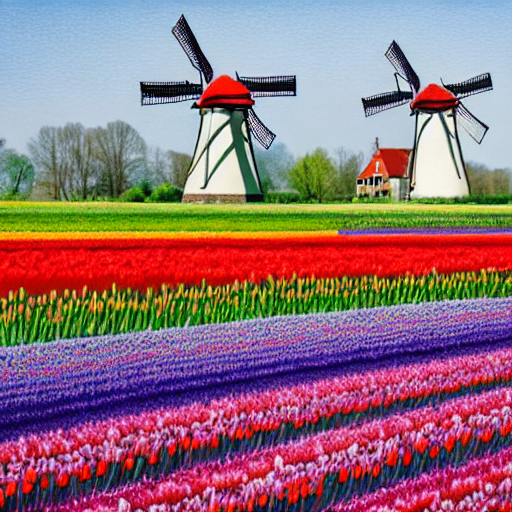

In [14]:
description_three = "Tulips and windmills in a countryside"
with autocast("cuda"):
  image_three = experimental_pipe(description_three).images[0]
image_three 

In [17]:
# defining the grid itself.
def grids(img, rows, cols):
    assert len(img) == rows*cols

    width, height = img[0].size
    grid = Image.new('RGB', size=(cols*width, rows*height))
    grid_width, grid_heigth = grid.size
    
    for i, img in enumerate(img):
        grid.paste(img, box=(i%cols*width, i//cols*height))
    return grid

  0%|          | 0/51 [00:00<?, ?it/s]

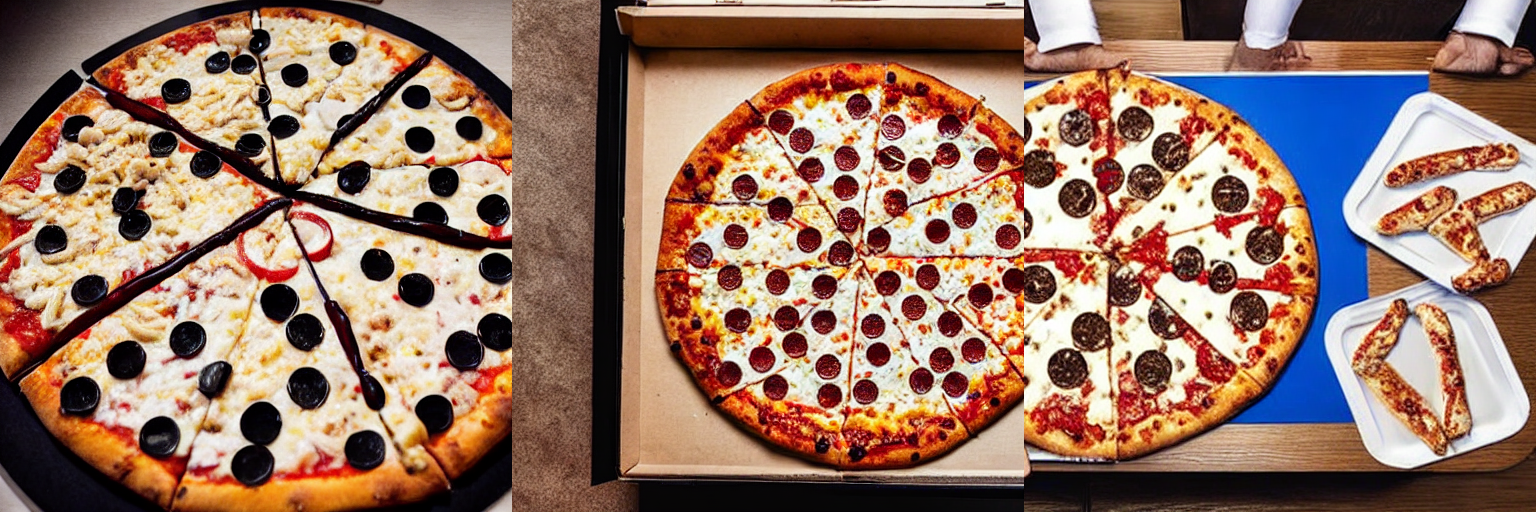

In [22]:
# prepare to display some of the above images in a grid.
num_images = 3
description = [description_one]*num_images
with autocast("cuda"):
  experiment_image = experimental_pipe(description).images

# display the grid of images.
grid = grids(experiment_image, rows=1, cols=3)
grid